In [1]:
import tensorflow as tf
import numpy as np

In [2]:
mnist = tf.keras.datasets.mnist #손글씨 이미지 데이터 로드
(x_train,y_train),(x_valid,y_valid) = mnist.load_data()

print(x_train.shape,y_train.shape) 
print(x_valid.shape,y_valid.shape)


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [3]:
# 홀 짝을 구분하는 새로운 레이블을 추가하여 모델 구현

y_train_odd = []
for y in y_train:
    if y%2 == 0:
        y_train_odd.append(0)
    else:
        y_train_odd.append(1)
        
y_train_odd = np.array(y_train_odd)
y_train_odd.shape


(60000,)

In [4]:
print(y_train[:10]) #정답 라벨
print(y_train_odd[:10]) # 홀짝 라벨

[5 0 4 1 9 2 1 3 1 4]
[1 0 0 1 1 0 1 1 1 0]


In [5]:
# 홀 짝을 구분하는 새로운 레이블을 추가하여 모델 구현
# 검증 셋

y_valid_odd = [] 
for y in y_valid:
    if y%2 == 0:
        y_valid_odd.append(0)
    else:
        y_valid_odd.append(1)
        
y_valid_odd = np.array(y_valid_odd)
y_valid_odd.shape


(10000,)

In [6]:
x_train = x_train /255.0
x_valid = x_valid /255.0

x_train_in = tf.expand_dims(x_train,-1)
x_valid_in = tf.expand_dims(x_valid,-1)

print(x_train_in.shape,x_valid_in.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [7]:
#Functional API를 이용한 모델 생성

# 입력 레이어
inputs = tf.keras.layers.Input(shape=(28,28,1))

# 숫자 판독을 진행하는 레이어들
conv =  tf.keras.layers.Conv2D(32,(3,3),activation='relu')(inputs)
pool = tf.keras.layers.MaxPooling2D((2,2))(conv)
flat = tf.keras.layers.Flatten()(pool)
#

# 홀짝 판별을하는 레이어
flat_inputs = tf.keras.layers.Flatten()(inputs)
#

# 숫자 판독과 홀짝을 입력으로 받아서 합성시키고 출력하는 레이어들
concat = tf.keras.layers.Concatenate()([flat,flat_inputs])
outputs = tf.keras.layers.Dense(10,activation='softmax')(concat)
#

model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

model.summary()


Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 26, 26, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 13, 13, 32)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
flatten (Flatten)               (None, 5408)         0           max_pooling2d[0][0]              
_______________________________________________________________________________________

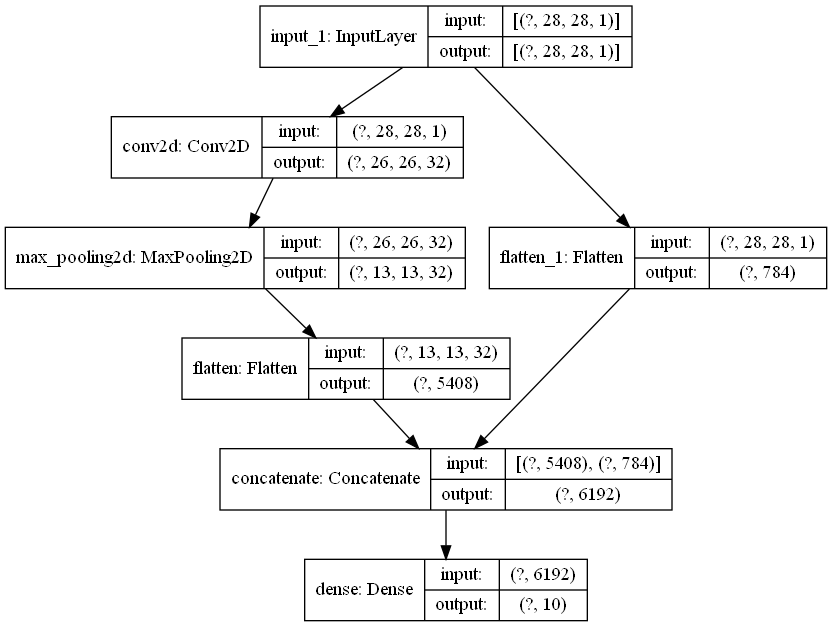

In [8]:
from tensorflow.python.keras.utils.vis_utils import plot_model
plot_model(model,show_shapes=True,show_layer_names=True,to_file='functional_cnn.png')

In [9]:
# 모델 컴파일

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train_in,y_train,validation_data=(x_valid_in,y_valid),epochs= 10)
# 입력 x_train_in,y_train, 검증 x_valid_in,y_valid, epochs 10)

# 모델 성능 출력

val_loss , val_acc = model.evaluate(x_valid_in ,y_valid)
print(val_loss, val_acc)

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1953 - accuracy: 0.9452 - val_loss: 0.0761 - val_accuracy: 0.9762
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0766 - accuracy: 0.9770 - val_loss: 0.0621 - val_accuracy: 0.9795
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0588 - accuracy: 0.9826 - val_loss: 0.0573 - val_accuracy: 0.9820
Epoch 4/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0484 - accuracy: 0.9857 - val_loss: 0.0625 - val_accuracy: 0.9786
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0400 - accuracy: 0.9876 - val_loss: 0.0520 - val_accuracy: 0.9830
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0350 - accuracy: 0.9892 - val_loss: 0.0562 - val_accuracy: 0.9824
Epoch 7/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0293 - accuracy: 0.9908 - val_loss: 0.0577 - val_ac

In [10]:
# Functional API를 이용한 모델 생성

#Functional API를 이용한 모델 생성

# 입력 레이어
inputs = tf.keras.layers.Input(shape=(28,28,1),name='inputs')

# 숫자 판독을 진행하는 레이어들
conv =  tf.keras.layers.Conv2D(32,(3,3),activation='relu',name='conv2d_layer')(inputs)
pool = tf.keras.layers.MaxPooling2D((2,2),name='maxpool_layer')(conv)
flat = tf.keras.layers.Flatten(name='flatten_layer')(pool)
#

# 홀짝 판별을하는 레이어
flat_inputs = tf.keras.layers.Flatten()(inputs)
#

# 숫자 판독과 홀짝을 입력으로 받아서 합성시키고 출력하는 레이어들
concat = tf.keras.layers.Concatenate()([flat,flat_inputs])
digit_outputs = tf.keras.layers.Dense(10,activation='softmax',name='digit_dense')(concat)
odd_outputs = tf.keras.layers.Dense(1,activation='sigmoid',name='odd_dense')(flat_inputs)
#

model = tf.keras.models.Model(inputs=inputs, outputs=[digit_outputs,odd_outputs])

model.summary()


Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_layer (Conv2D)           (None, 26, 26, 32)   320         inputs[0][0]                     
__________________________________________________________________________________________________
maxpool_layer (MaxPooling2D)    (None, 13, 13, 32)   0           conv2d_layer[0][0]               
__________________________________________________________________________________________________
flatten_layer (Flatten)         (None, 5408)         0           maxpool_layer[0][0]              
_______________________________________________________________________________________

In [12]:
print(model.input)

Tensor("inputs:0", shape=(None, 28, 28, 1), dtype=float32)


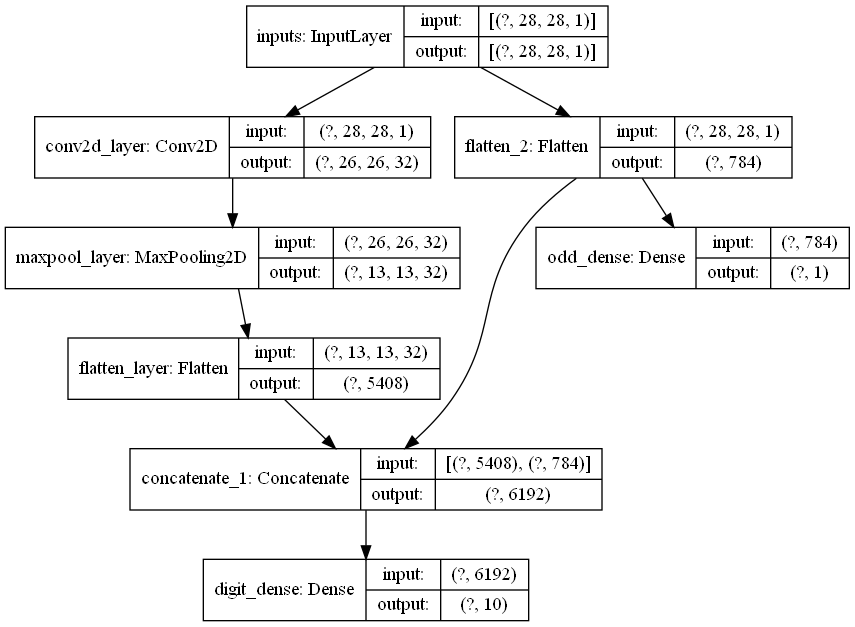

In [13]:
plot_model(model, show_shapes=True,show_layer_names=True,to_file='multi_output_cnn.png')

In [18]:
model.compile(optimizer='adam',loss={'digit_dense':'sparse_categorical_crossentropy','odd_dense':'binary_crossentropy'},
             loss_weights={'digit_dense':1,'odd_dense':0.5},
             # loss = 1.0 * sparse_catogorical_crossentropy + 0.5 * binary_crosentropy
             metrics=['accuracy'])


history = model.fit({'inputs':x_train_in},{'digit_dense':y_train,'odd_dense':y_train_odd},
                   validation_data=({'inputs':x_valid_in},{'digit_dense':y_valid,'odd_dense':y_valid_odd}),epochs=10)
              
              
              
                        

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3658 - digit_dense_loss: 0.2029 - odd_dense_loss: 0.3258 - digit_dense_accuracy: 0.9416 - odd_dense_accuracy: 0.8636 - val_loss: 0.2314 - val_digit_dense_loss: 0.0923 - val_odd_dense_loss: 0.2781 - val_digit_dense_accuracy: 0.9719 - val_odd_dense_accuracy: 0.8842
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2114 - digit_dense_loss: 0.0753 - odd_dense_loss: 0.2720 - digit_dense_accuracy: 0.9782 - odd_dense_accuracy: 0.8904 - val_loss: 0.1993 - val_digit_dense_loss: 0.0680 - val_odd_dense_loss: 0.2626 - val_digit_dense_accuracy: 0.9772 - val_odd_dense_accuracy: 0.8975
Epoch 3/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1899 - digit_dense_loss: 0.0585 - odd_dense_loss: 0.2628 - digit_dense_accuracy: 0.9825 - odd_dense_accuracy: 0.8952 - val_loss: 0.1936 - val_digit_dense_loss: 0.0640 - val_odd_dense_loss: 0.2592 - val_digit_dense_accuracy: 0.9808 - va

In [19]:
model.evaluate({'inputs':x_valid_in},{'digit_dense':y_valid,'odd_dense':y_valid_odd})

313/313 [==============================] - 1s 2ms/step - loss: 0.1953 - digit_dense_loss: 0.0672 - odd_dense_loss: 0.2563 - digit_dense_accuracy: 0.9823 - odd_dense_accuracy: 0.9015


[0.19531455636024475,
 0.06717100739479065,
 0.2562871277332306,
 0.9822999835014343,
 0.9014999866485596]

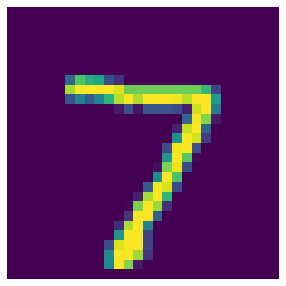

In [21]:
import matplotlib.pylab as plt

def plot_image(data, idx):
    plt.figure(figsize=(5,5))
    plt.imshow(data[idx])
    plt.axis("off")
    plt.show()
    
plot_image(x_valid, 0)

In [23]:
digit_preds, odd_preds = model.predict(x_valid_in)
print(digit_preds[0])
print(odd_preds[0])

[4.3946144e-12 1.0910904e-09 1.2572264e-07 2.5989527e-06 2.9962737e-11
 2.4813643e-12 6.8405051e-20 9.9999726e-01 1.0812360e-08 1.6798367e-08]
[0.9994614]


In [24]:
digit_labels = np.argmax(digit_preds,axis=-1)
digit_labels[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [28]:
odd_labels=(odd_preds> 0.5).astype(int).reshape(1,-1)[0]
odd_labels[0:10]

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 1])